<a href="https://colab.research.google.com/github/ahmedfathi1/Sales-Repository/blob/main/Project_1_part_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

##Importing data

In [2]:
url = ('https://docs.google.com/spreadsheets/d/e/2PACX-1vT7T4OEvxCrrx8SNk2CNc9yyApd4S8_rhhT2p2zqCeptIaPmGiSlh-bKDDYQ6beipefWAOvzlb_glAe/pub?output=csv')
df = pd.read_csv(url)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Creating a copy of the dataframe

In [3]:
eda_df = df.copy()


##Checking for duplicate data

In [4]:
#duplicates
eda_df.duplicated().sum()


0

##Identify the features (X) and target (y)

In [5]:
X = eda_df.drop(columns = ['Item_Outlet_Sales'])
y = eda_df['Item_Outlet_Sales']

##Splitting Training and Test data

In [6]:
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Initiating Transformer

In [7]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')

##Setting up pipelines

In [8]:
# Setup the pipelines for the numeric and categorical data

num_pipeline = make_pipeline(mean_imputer, scaler)
nom_pipeline = make_pipeline(missing_imputer, ohe)

##Creating tupples to pair with pipelines

In [9]:
nominal_cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type']

num_selector = make_column_selector(dtype_include='number')

# Setup the tuples to pair the processors with the make column selectors

numeric_tuple = (num_pipeline, num_selector)
nominal_tuple = (nom_pipeline, nominal_cols)

##Create Column Transformer to Apply Different Preprocessing to Different Columns

In [10]:
preprocessor = make_column_transformer(numeric_tuple, 
                                          nominal_tuple, 
                                          remainder='drop')

##Fitting onto the X_train Data ONLY

In [11]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5127644590>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Identifier', 'Item_Fat_Content',
                                  'Item_Type', 'Outlet_Identifier',
                                  'Outlet_Establishment_Year',
                                  'Outlet_Location_Type', 'Outlet_Type'])])

##Transform both train and test data

In [12]:
X_train_transformed = preprocessor.transform(X_train)

X_test_transformed = preprocessor.transform(X_test)

##Check the X_train data

In [13]:
X_train_transformed[:5]

array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       [-1.1692189 , -1.00493112, -0.95259072, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.52881915, -0.96548425, -0.33646004, ...,  1.        ,
         0.        ,  0.        ]])

# Fitting a Linear Regression Model

In [14]:
# Importing the libraries 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
# Function for finding the r^2 and rsme
def eval_regression(true, pred, split='training'):
  """Takes true and predicted values (arrays) and prints MSE, RMSE and R2"""
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'Results for {split} data: \n MSE {mse},\n RMSE: {rmse},\n R^2: {r2} ')

In [16]:
# instantiating the model
reg = LinearRegression()

In [17]:
# creating the model pipeline
reg_pipe = make_pipeline(preprocessor, reg)
reg_pipe.fit(X_train, y_train) # Here the model is learning the relationship between the X and y values

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5127644590>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Identifier',
                                                   'Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Establishment_Year',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('linearregression', LinearRegression())])

In [18]:
# Make predictions
pred_train = reg_pipe.predict(X_train)
pred_test = reg_pipe.predict(X_test)

In [27]:
# Evaluating the models performance
eval_regression(y_train, pred_train)
eval_regression(y_test, pred_test, split = 'Test')

Results for training data: 
 MSE 971783.9725635101,
 RMSE: 985.791038995339,
 R^2: 0.6716342227805123 
Results for Test data: 
 MSE 3.7551702997506256e+25,
 RMSE: 6127944434923.203,
 R^2: -1.361073292029863e+19 


# Regression Tree Model

In [29]:
# Importing libraries
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [30]:
# Creating an instance of the model
dec_tree = make_pipeline(preprocessor, DecisionTreeRegressor(random_state = 42))

# Fitting the model so that it can learn the relationship between the X and y features
dec_tree.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5127644590>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Identifier',
                                                   'Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Establishment_Year',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [31]:
# Predicting the target values
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [32]:
# Evaluate the model
eval_regression(y_train, train_preds)
eval_regression(y_test, test_preds, split = 'Test')

Results for training data: 
 MSE 2.4264137179864312e-29,
 RMSE: 4.925864104892086e-15,
 R^2: 1.0 
Results for Test data: 
 MSE 2087750.2486376497,
 RMSE: 1444.9049271968206,
 R^2: 0.24328835258467107 


### You can see that the model performs too well with the training data and very badly with the testing data

In [34]:
# Tuning the model by looking for the best depths (pulled from: https://github.com/coding-dojo-data-science/Project1_Exemplar/blob/main/DS_Salaries.ipynb)

#create a range of max_depth values
depths = range(1, dec_tree['decisiontreeregressor'].get_depth())

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths
for n in depths:
  #fit a new model with max_depth
  tree = DecisionTreeRegressor(random_state = 42, max_depth=n)

  #put the model into a pipeline
  tree_pipe = make_pipeline(preprocessor, tree)
  
  #fit the model
  tree_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred2 = tree_pipe.predict(X_train)
  test_pred2 = tree_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred2)
  test_r2score = r2_score(y_test, test_pred2)
  
  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

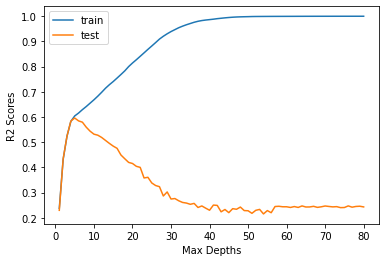

In [35]:
# Plotting the scores to visually see the scores and figure out the best max depth
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [39]:
# Finding the best depth 
scores.sort_values(by='Test', ascending=False).index[0]


5

In [40]:
# Redoing the Regressor model using the best depth 
best_reg = DecisionTreeRegressor(random_state = 42, max_depth = 5)

best_reg_pipe = make_pipeline(preprocessor, best_reg)

best_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5127644590>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Identifier',
                                                   'Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Establishment_Year',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [41]:
# Creating new predicted variables using the tuned model
best_reg_train = best_reg_pipe.predict(X_train)
best_reg_test = best_reg_pipe.predict(X_test)

In [42]:
# Looking at the new metrics for our model where the max depth is 5
eval_regression(y_train, best_reg_train)
eval_regression(y_test, best_reg_test, split = 'Test')

Results for training data: 
 MSE 1171332.784431318,
 RMSE: 1082.281287111312,
 R^2: 0.6042066848171654 
Results for Test data: 
 MSE 1114615.8633462703,
 RMSE: 1055.7536944506849,
 R^2: 0.5960039728227073 


### After tuning the regressor model, it performs fairly well on both training and testing sets.

# After looking at both models, I would recommend implementing the Regression Tree Model as it fits both the training and testing sets pretty well.